In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as k
%matplotlib inline

Unzipping the dataset containing images of different genders.

In [7]:
!unzip /home/ahad/Desktop/archivve.zip

Archive:  /home/ahad/Desktop/archivve.zip
replace Training/female/131422.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Creating directories of training and validation data.

In [2]:
train_data_dir = r"/home/ahad/Desktop/archivve/Training"

In [3]:
validation_data_dir = r"/home/ahad/Desktop/archivve/Validation"

Setting the parameters.

In [4]:
nb_train_sample=10
nb_validation_samples=10
epochs=50
batch_size=5
img_width, img_height = 150,150

In [5]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

Generating image data , training and validation , using an Image Data Generator for the purpose of getting images in different forms which would result in more efficient results.

In [6]:
train_datagen = ImageDataGenerator (rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['female','male'])

Found 47009 images belonging to 2 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 11649 images belonging to 2 classes.


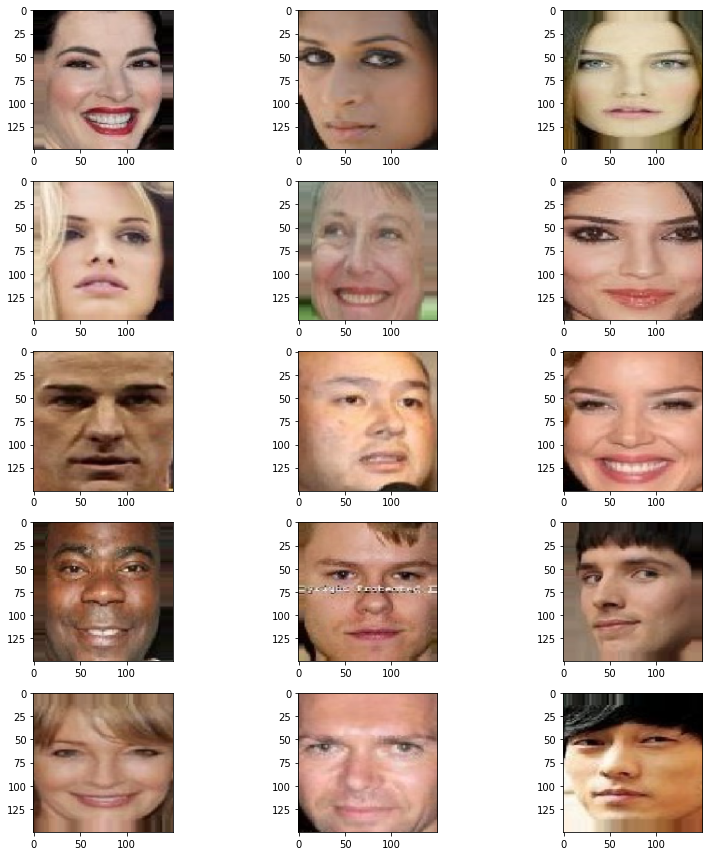

In [9]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [10]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [12]:
modeltraining = model.fit(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,
                         validation_data=validation_generator,
                         validation_steps=nb_validation_samples)

Epoch 1/50
10/10 [==============================] - 6s 469ms/step - loss: 22.5492 - accuracy: 0.3600 - val_loss: 1.2688 - val_accuracy: 0.4000
Epoch 2/50
10/10 [==============================] - 4s 422ms/step - loss: 1.7978 - accuracy: 0.6000 - val_loss: 1.5019 - val_accuracy: 0.4000
Epoch 3/50
10/10 [==============================] - 4s 362ms/step - loss: 1.4328 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4600
Epoch 4/50
10/10 [==============================] - 4s 378ms/step - loss: 0.6878 - accuracy: 0.6200 - val_loss: 0.6919 - val_accuracy: 0.5200
Epoch 5/50
10/10 [==============================] - 4s 369ms/step - loss: 0.6947 - accuracy: 0.4800 - val_loss: 0.6937 - val_accuracy: 0.4600
Epoch 6/50
10/10 [==============================] - 4s 415ms/step - loss: 0.7670 - accuracy: 0.6600 - val_loss: 0.6929 - val_accuracy: 0.5200
Epoch 7/50
10/10 [==============================] - 4s 369ms/step - loss: 0.6959 - accuracy: 0.5400 - val_loss: 0.6923 - val_accuracy: 0.5400
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


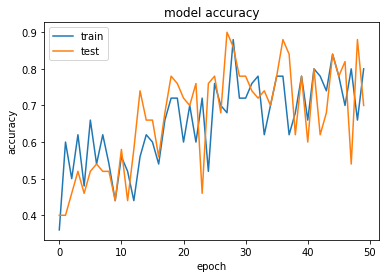

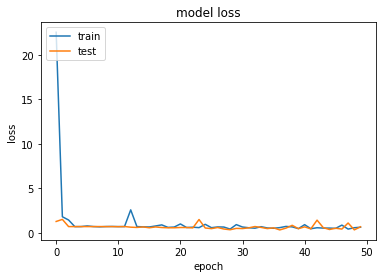

In [13]:
print(modeltraining.history.keys())
plt.plot(modeltraining.history['accuracy'])
plt.plot(modeltraining.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper left')
plt.show()

plt.plot(modeltraining.history['loss'])
plt.plot(modeltraining.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper left')
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image

img_pred = image.load_img("/home/ahad/Desktop/archivve/Validation/male/063531.jpg.jpg",target_size=(150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

result = model.predict(img_pred)
print(result)
prediction = " "
if result[0][0] == 1:
    prediction = "Woman"
else:
    prediction = "Men"
print("Prediction: ",prediction)

[[0.]]
Prediction:  Men
